In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

def create_fixed_degree_network(num_nodes_x, num_nodes_y, degree_x, degree_y,seed=None):

    # Set the seed for reproducibility
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    
    # Define degree sequence
    degree_sequence = [degree_x] * num_nodes_x + [degree_y] * num_nodes_y

    # Check if the sum of degrees is even
    if sum(degree_sequence) % 2 != 0:
        raise ValueError("The sum of degrees must be even to form a valid graph.")

    # Generate a random graph using the configuration model
    G = nx.configuration_model(degree_sequence)

    # Convert the multigraph to a simple graph (remove parallel edges and self-loops)
    G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))

    return G

def create_fixed_degree_network_v2(num_nodes_x, num_nodes_y, degree_x, degree_y, seed=None):
    """
    Creates a fixed degree network with the specified parameters, ensuring the graph is a single connected component.

    Parameters:
    - num_nodes_x (int): Number of nodes of type X.
    - num_nodes_y (int): Number of nodes of type Y.
    - degree_x (int): Degree of each node of type X.
    - degree_y (int): Degree of each node of type Y.
    - seed (int, optional): Random seed for reproducibility.

    Returns:
    - G (networkx.Graph): A simple, connected graph with the specified degree sequence.
    """
    # Set the seed for reproducibility
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    
    # Define degree sequence
    degree_sequence = [degree_x] * num_nodes_x + [degree_y] * num_nodes_y

    # Check if the sum of degrees is even
    if sum(degree_sequence) % 2 != 0:
        raise ValueError("The sum of degrees must be even to form a valid graph.")
    
    while True:
        # Generate a random graph using the configuration model
        G = nx.configuration_model(degree_sequence)

        # Convert the multigraph to a simple graph (remove parallel edges and self-loops)
        G = nx.Graph(G)
        G.remove_edges_from(nx.selfloop_edges(G))

        # Check if the graph is connected
        if nx.is_connected(G):
            return G

# Generate a random graph using the Erdős-Rényi model
def erdos_renyi_graph(num_nodes,probability):
    graph = nx.erdos_renyi_graph(n=num_nodes, p=probability)

    #keep the largest connected component
    largest_cc = max(nx.connected_components(graph), key=len)
    graph = graph.subgraph(largest_cc)
    return graph

#watts_strogarz model (small-world)
def watts_strogarz_graph(n,k,p):
    graph = nx.watts_strogatz_graph(n,k,p,seed=100)

    #keep the largest connected component
    largest_cc = max(nx.connected_components(graph), key=len)
    graph = graph.subgraph(largest_cc)

    return graph

#scale free networks
def barabasi_albert_graph(n,m):

    graph = nx.barabasi_albert_graph(n,m,seed=100)
   
    #keep the largest connected component
    largest_cc = max(nx.connected_components(graph), key=len)
    graph = graph.subgraph(largest_cc)
    
    return graph

#stochastic_block_model
def stochastic_block_model(sizes, probs):

    graph = nx.stochastic_block_model(sizes, probs, seed=100)
   
    #keep the largest connected component
    largest_cc = max(nx.connected_components(graph), key=len)
    graph = graph.subgraph(largest_cc)
    
    return graph

In [3]:
graph = stochastic_block_model([10,10,10],
                               [[0.8,0.2,0.2],[0.2,0.8,0.2],[0.2,0.2,0.8]])

#graph = watts_strogarz_graph(100,2,0.5)

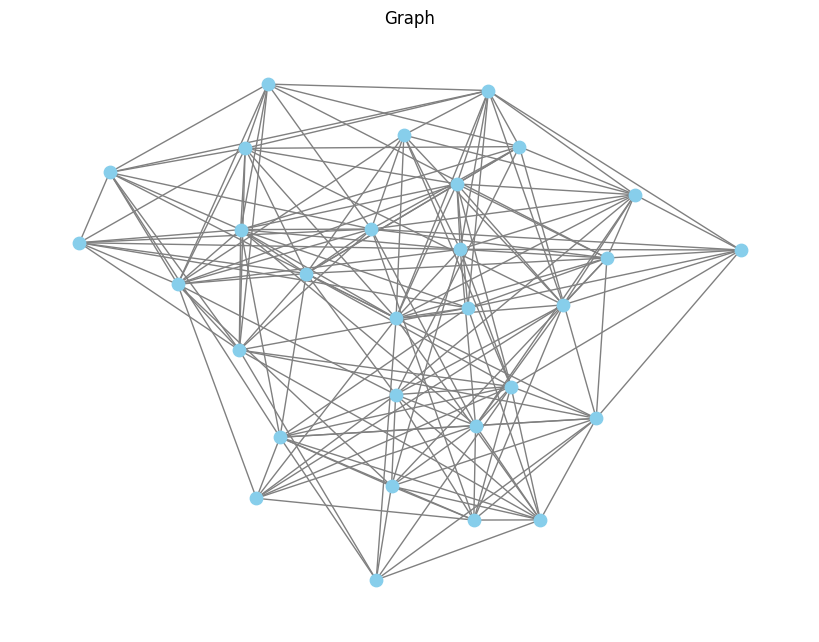

connected components: 1


In [4]:
# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=False, node_color='skyblue', edge_color='gray', node_size=80, font_size=10)
plt.title("Graph")
plt.show()

print("connected components: "+str(nx.number_connected_components(graph)))

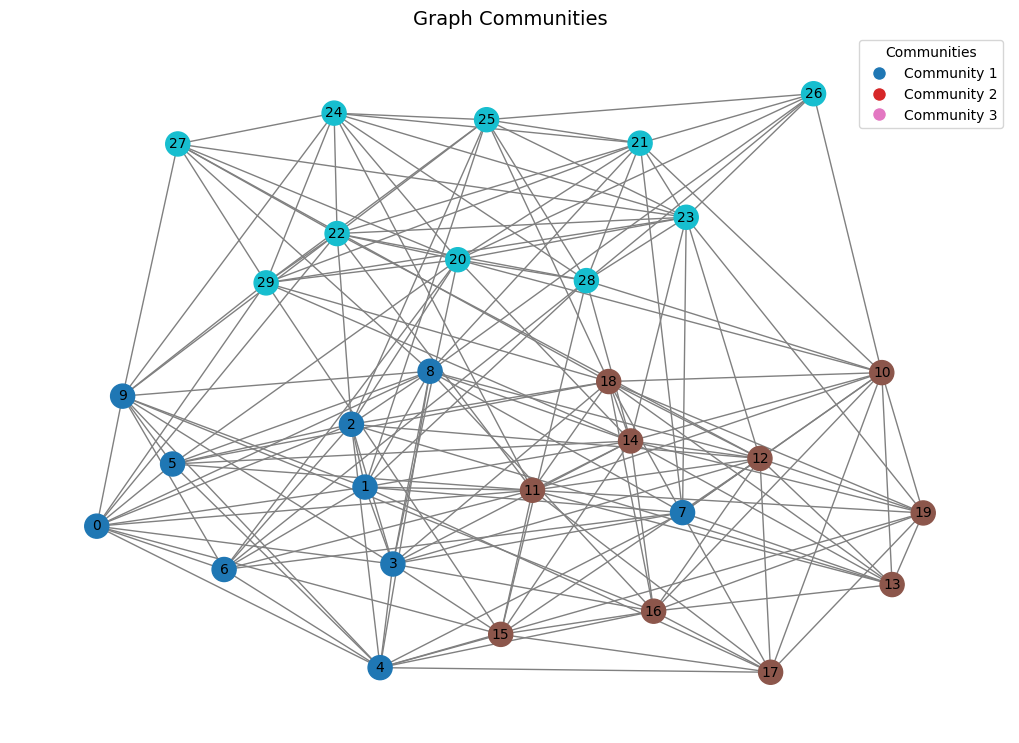

In [5]:
#Community Deteccion

communities = list(nx.algorithms.community.louvain_communities(graph))

def plot_communities(graph, communities):

    #Assign community numbers to nodes
    community_mapping = {}
    for i, community in enumerate(communities):
        for node in community:
            community_mapping[node] = i
    
    # Step 4: Prepare node colors based on communities
    colors = [community_mapping[node] for node in graph.nodes()]
    
    # Step 5: Draw the graph with communities
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(graph, seed=42)  # Layout for consistent visualization
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_color=colors,
        node_size=300,
        cmap=plt.cm.tab10,  # Use a colormap for community coloring
        edge_color="gray",
        font_size=10,
    )
    # Add community labels to the legend
    handles = []
    for i, community in enumerate(communities):
        handle = plt.Line2D([0], [0], marker='o', color='w', label=f'Community {i+1}', 
                             markersize=10, markerfacecolor=plt.cm.tab10(i / len(communities)))
        handles.append(handle)
    
    plt.legend(handles=handles, title="Communities", loc="upper right")
    plt.title("Graph Communities", fontsize=14)
    plt.show()


plot_communities(graph, communities)

In [7]:
#measure of centrality (betweeness centrality)

centrality = nx.betweenness_centrality(graph, k=None, normalized=True, weight=None, endpoints=False, seed=100)

#centrality for every community

# Calculate average betweenness centrality for each community
community_averages = []
for community in communities:
    centrality_sum = sum(centrality[node] for node in community if node in centrality)
    community_size = len(community)
    average_centrality = centrality_sum / community_size
    community_averages.append(average_centrality)

# Display results
for i, avg in enumerate(community_averages):
    print(f"Community {i+1}: Average Betweenness Centrality = {avg:.4f}")

Community 1: Average Betweenness Centrality = 0.0216
Community 2: Average Betweenness Centrality = 0.0242
Community 3: Average Betweenness Centrality = 0.0185


In [8]:
communities

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
 {10, 11, 12, 13, 14, 15, 16, 17, 18, 19},
 {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}]

In [9]:
# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(graph).toarray()

# Compute the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(graph).tocsc()

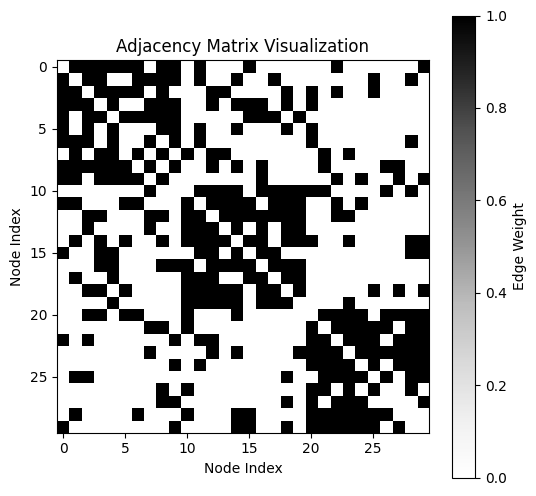

In [10]:
# Visualize the adjacency matrix as a lattice
plt.figure(figsize=(6, 6))
plt.imshow(adj_matrix, cmap='Greys', interpolation='none')
plt.colorbar(label="Edge Weight")
plt.title("Adjacency Matrix Visualization")
plt.xlabel("Node Index")
plt.ylabel("Node Index")
plt.show()

In [12]:
def RK4_FD(eq, fields, parameters, grids, dt, Nt, operators, t_rate): #implementa rouge-kutta
    t_grid = grids[0]
    x_grid = grids[1]
    y_grid = grids[2]
    fields_history = []
    time_grid = []
    for i in range(Nt - 1):
        old_fields = fields
        k_1 = equations_FD(eq, old_fields, t_grid[i], x_grid, y_grid, parameters, operators)
        k_2 = equations_FD(eq, old_fields + 0.5 * dt * k_1, t_grid[i], x_grid, y_grid, parameters, operators)
        k_3 = equations_FD(eq, old_fields + 0.5 * dt * k_2, t_grid[i], x_grid, y_grid, parameters, operators)
        k_4 = equations_FD(eq, old_fields + dt * k_3, t_grid[i], x_grid, y_grid, parameters, operators)
        new_fields = old_fields + dt * (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6
        fields = new_fields
        if i % t_rate == 0:
            fields_history.append(fields)
            time_grid.append(t_grid[i])
    return fields, fields_history, time_grid

def equations_FD(eq, field_slices, t_i, x_grid, y_grid, parameters, operators): #ecuaciones
    if eq == 'duffing':
        U = field_slices[0]
        V = field_slices[1]

        alpha = parameters[0]
        mu = parameters[1]
        gamma = parameters[2]
        k = parameters[3]
        w = parameters[4]
        DD = operators[0]

        ddU = DD @ U

        F = V
        G = - U + alpha * U ** 3 - U ** 5 - mu * V + gamma * np.cos(w * t_i) + k * ddU

        fields = np.array([F, G])
    return fields

def Der(D, f): #función de diferenciación
    d_f = D @ f
    return d_f

In [14]:
#Definicion de parámetros

alpha = 0.4                                     # NONLINEAR COEFFICIENT
mu = 0.1                                        # DISSIPATION
gamma = 2.90#2.7                                    # DRIVE STRENGTH
k = 0.028 #0.4216                                      # COUPLING (0.42)
w = 0.7
eq = 'duffing'
t_rate = 10

In [50]:
# Grid definition
N_nodes = 30
[tmin, tmax, dt] = [0, 3000, 0.01]
t_grid = np.arange(tmin, tmax + dt, dt)         # TEMPORAL GRID DEFINITION
[xmin, xmax, dx] = [0, N_nodes, 1]
x_grid = np.arange(xmin, xmax, dx)              # SPATIAL FRID DEFINITION

T = tmax
Nt = t_grid.shape[0]
Nx = x_grid.shape[0]

# Initial Conditions
U_init = 1.0 * np.ones(Nx)
arg_chimera = [15]#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]#                                  # INITIAL QUIMERA SIZE
for i in arg_chimera:
    U_init[i] = 2.0
U_init = U_init + 0.0 * (np.random.rand(Nx) - 0.5)
V_init = 0.0 * np.random.rand(Nx)

In [51]:
operators = [laplacian_matrix]

In [52]:
# Empaquetamiento de parametros, campos y derivadas para integración
fields_init = [U_init, V_init]
grids = [t_grid, x_grid, 0]
parameters_np = np.array([alpha, mu, gamma, k, w])

In [53]:
final_fields, fields_history, time_grid = RK4_FD(eq, fields_init, parameters_np, grids, dt, Nt, operators, t_rate)

In [54]:
# Reobteniendo campos
U = np.array(fields_history)[:, 0]
V = np.array(fields_history)[:, 1]

In [55]:
from scipy.signal import hilbert
import scipy.sparse as sparse

phase = np.angle(hilbert(U, axis=0))
phase = np.unwrap(phase)
lightness = 1
U_light = U[0::lightness]
V_light = V[0::lightness]
phase_light = phase[0::lightness]
t_light = time_grid[0::lightness]
R = (1 / Nx) * np.abs(np.sum(np.exp(1j * phase), axis=1))

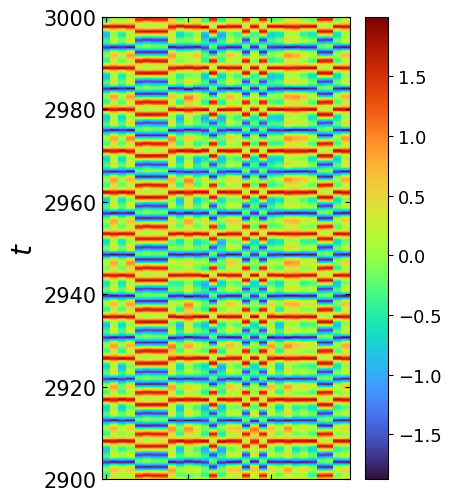

In [58]:
t_init = 2900
t_final = 3000

fig, (ax01) = plt.subplots(1, 1, figsize=(4, 6))
cax_01 = ax01.pcolormesh(x_grid, t_light, U_light, cmap="turbo", shading='auto')
cbar = fig.colorbar(cax_01)
cbar.ax.tick_params(labelsize=13)
ax01.tick_params(axis="y", direction="in", labelsize=15, left=True, right=True, labelleft=True, labelright=False)
ax01.tick_params(axis="x", direction="in", labelsize=15, top=True, bottom=True, labeltop=False, labelbottom=False)
ax01.set_ylabel("$t$", fontsize=20)
ax01.set_ylim(t_init, t_final)

figure_dir = "C:/Users/Rafa/PycharmProjects/LENL_simulations/00_projects/network_chimeras/simulations/figures"
plt.savefig(figure_dir + '/fig_chimeras.png', dpi=300)

(0.0, 500.0)

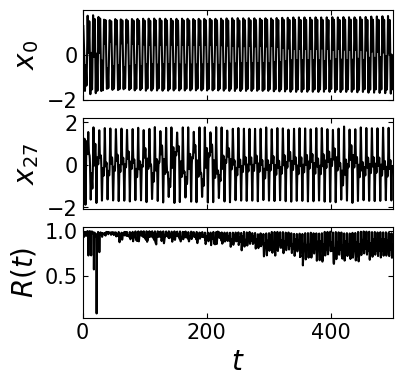

In [24]:
fig, (ax01, ax02, ax03) = plt.subplots(3, 1, figsize=(4, 4))
ax01.plot(t_light, U_light[:, 0], color="k")
ax01.tick_params(axis="y", direction="in", labelsize=15, left=True, right=True, labelleft=True, labelright=False)
ax01.tick_params(axis="x", direction="in", labelsize=15, top=True, bottom=True, labeltop=False, labelbottom=False)
ax01.set_ylabel("$x_0$", fontsize=20)
ax01.set_xlim(t_init, t_final)

ax02.plot(t_light, U_light[:, 27], color="k")
ax02.tick_params(axis="y", direction="in", labelsize=15, left=True, right=True, labelleft=True, labelright=False)
ax02.tick_params(axis="x", direction="in", labelsize=15, top=True, bottom=True, labeltop=False, labelbottom=False)
ax02.set_ylabel(f"$x_{{{27}}}$", fontsize=20)
ax02.set_xlim(t_init, t_final)

ax03.plot(t_light, R, color="k")
ax03.tick_params(axis="y", direction="in", labelsize=15, left=True, right=True, labelleft=True, labelright=False)
ax03.tick_params(axis="x", direction="in", labelsize=15, top=True, bottom=True, labeltop=False, labelbottom=True)
ax03.set_xlabel("$t$", fontsize=20)
ax03.set_ylabel("$R(t)$", fontsize=20)
ax03.set_xlim(t_init, t_final)

(0.0, 50.0)

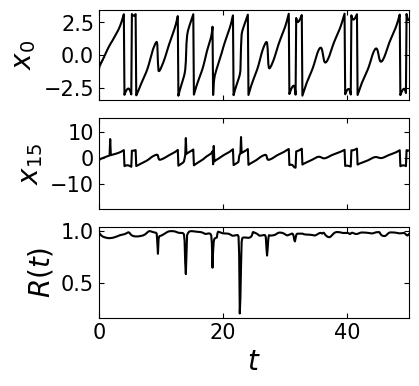

In [792]:
fig, (ax01, ax02, ax03) = plt.subplots(3, 1, figsize=(4, 4))
ax01.plot(t_light, phase_light[:, 0], color="k")
ax01.tick_params(axis="y", direction="in", labelsize=15, left=True, right=True, labelleft=True, labelright=False)
ax01.tick_params(axis="x", direction="in", labelsize=15, top=True, bottom=True, labeltop=False, labelbottom=False)
ax01.set_ylabel("$x_0$", fontsize=20)
ax01.set_xlim(0, 50)

ax02.plot(t_light, phase_light[:, int(N_nodes/2)], color="k")
ax02.tick_params(axis="y", direction="in", labelsize=15, left=True, right=True, labelleft=True, labelright=False)
ax02.tick_params(axis="x", direction="in", labelsize=15, top=True, bottom=True, labeltop=False, labelbottom=False)
ax02.set_ylabel(f"$x_{{{N_nodes // 2}}}$", fontsize=20)
ax02.set_xlim(0, 50)

ax03.plot(t_light, R, color="k")
ax03.tick_params(axis="y", direction="in", labelsize=15, left=True, right=True, labelleft=True, labelright=False)
ax03.tick_params(axis="x", direction="in", labelsize=15, top=True, bottom=True, labeltop=False, labelbottom=True)
ax03.set_xlabel("$t$", fontsize=20)
ax03.set_ylabel("$R(t)$", fontsize=20)
ax03.set_xlim(0, 50)